# fvGP comprehensive test

## (0) Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fvgp.gp import GP
%load_ext autoreload
%autoreload 2

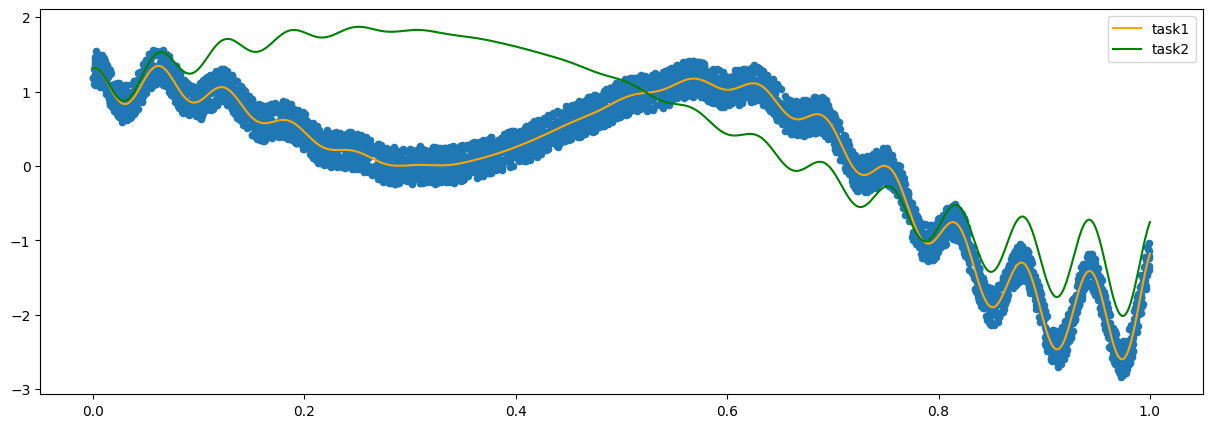

In [2]:
x = np.linspace(0,1,1000)
def f1(x):
    return np.sin(5. * x) + np.cos(10. * x) + (2.* (x-0.4)**2) * np.cos(100. * x)

def f2(x):
    return np.sin(5. * x) + np.cos(2. * x) + (2.* (x-0.4)**2) * np.cos(100. * x)

x_data = np.random.rand(5000)
y_data = f1(x_data) + (np.random.rand(len(x_data))-0.5) * 0.5
plt.figure(figsize = (15,5))
plt.plot(x,f1(x), color = 'orange', label = 'task1')
plt.plot(x,f2(x), color = 'green',  label = 'task2')
plt.legend()
plt.scatter(x_data,y_data, s = 20)

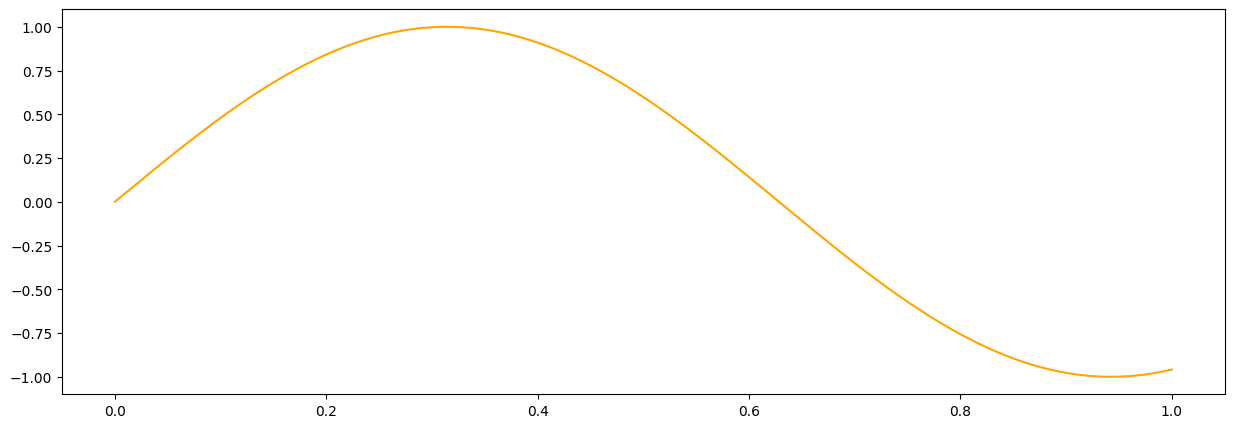

In [3]:
#stationary
def skernel(x1,x2,hps,obj):
    d = obj._get_distance_matrix(x1,x2)
    return hps[0] * obj.matern_kernel_diff1(d,hps[1])

def meanf(x, hps, obj):
    return np.sin(hps[2] * x)
plt.figure(figsize = (15,5))
plt.plot(x,meanf(x, np.array([1.,1.,5.0]), None), color = 'orange', label = 'task1')

In [9]:
my_gp1 = GP(1, x_data,y_data,np.ones((2)),
            variances=None, 
            compute_device='cpu', 
            gp_kernel_function=None, 
            gp_kernel_function_grad=None, 
            gp_mean_function=None, 
            gp_mean_function_grad=None,  
            normalize_y=False, 
            sparse_mode=True,
            store_inv=True, 
            ram_economy=True, 
            args=None,
            )

x_pred = np.linspace(0,1,1000)

my_gp1.train(np.array([[0.001,10.],[0.001,0.002]]), method='global')
print("hps: ", my_gp1.get_hyperparameters())
#my_gp1.train(np.array([[0.001,10.],[0.001,10.]]), method='local')
#print(my_gp1.get_hyperparameters())
#my_gp1.train(np.array([[0.001,10.],[0.001,10.]]), method='mcmc', max_iter=1000)
#print(my_gp1.get_hyperparameters())
#my_gp1.train(np.array([[0.001,10.],[0.001,10.]]), method='hgdl')



#let's make a prediction
mean1 = my_gp1.posterior_mean(x_pred.reshape(-1,1))["f(x)"]
var1 =  my_gp1.posterior_covariance(x_pred.reshape(-1,1))["v(x)"]

plt.figure(figsize = (16,10))
plt.plot(x,mean1, label = "posterior mean", linewidth = 4)
plt.plot(x,f1(x), label = "latent function", linewidth = 4)
plt.fill_between(x, mean1 - 3. * np.sqrt(var1), mean1 + 3. * np.sqrt(var1), alpha = 0.5, color = "grey", label = "var")
#plt.plot(x, (f(x)-mean1)**2)
plt.scatter(x_data,y_data, color = 'black')
#plt.legend(fontsize = 20)
plt.xticks([])
plt.yticks([])
print("error: ", np.sqrt(np.sum(f1(x)-mean1)**2 / len(mean1)))



Sparse mode enabled but no sparsity detected 1.0 hps:  [1. 1.]
Sparse mode enabled but no sparsity detected 1.0 hps:  [1. 1.]
Sparsity detected:  0.00341112 hps:  [4.86514641e+00 1.60873313e-03]
Sparsity detected:  0.00257832 hps:  [1.25910548e+00 1.18703708e-03]
Sparsity detected:  0.00300592 hps:  [6.32662077e+00 1.40158743e-03]
Sparsity detected:  0.00293512 hps:  [8.69804477e+00 1.36590936e-03]
Sparsity detected:  0.00418736 hps:  [5.53550376e+00 1.99882716e-03]
Sparsity detected:  0.00276816 hps:  [4.48283369e+00 1.28103761e-03]
Sparsity detected:  0.0034988 hps:  [7.50672619e+00 1.65206946e-03]
Sparsity detected:  0.00238344 hps:  [4.07933424e+00 1.08749615e-03]
Sparsity detected:  0.0022092 hps:  [5.23337991e+00 1.00062295e-03]
Sparsity detected:  0.00401272 hps:  [9.34635330e+00 1.91314788e-03]
Sparsity detected:  0.0037728 hps:  [7.04859882e+00 1.79234047e-03]
Sparsity detected:  0.00284864 hps:  [5.83708070e+00 1.32296236e-03]
Sparsity detected:  0.00322968 hps:  [9.67655863e

Sparsity detected:  0.00400312 hps:  [2.33494135e+00 1.90828469e-03]
Sparsity detected:  0.00342216 hps:  [5.53550376e+00 1.61388221e-03]
Sparsity detected:  0.00382328 hps:  [2.54652090e+00 1.81768381e-03]
Sparsity detected:  0.00416456 hps:  [6.84051765e+00 1.98723149e-03]
Sparsity detected:  0.00268248 hps:  [9.26907839e+00 1.23844338e-03]
Sparsity detected:  0.00417544 hps:  [2.89910359e+00 1.99227916e-03]
Sparsity detected:  0.0041128 hps:  [6.34135667e+00 1.96148110e-03]
Sparsity detected:  0.00245096 hps:  [2.01221562e+00 1.12144869e-03]
Sparsity detected:  0.00257936 hps:  [2.28771228e+00 1.18783756e-03]
Sparsity detected:  0.00333816 hps:  [2.55506715e+00 1.56998636e-03]
Sparsity detected:  0.00382328 hps:  [2.54652090e+00 1.81768381e-03]
Sparsity detected:  0.00402136 hps:  [9.19114336e+00 1.91748835e-03]
Sparsity detected:  0.00342792 hps:  [5.41581893e+00 1.61639034e-03]
Sparsity detected:  0.00403792 hps:  [9.06290914e+00 1.92538076e-03]
Sparsity detected:  0.00401712 hps:

Sparsity detected:  0.00408264 hps:  [4.86448592e+00 1.94630830e-03]
Sparsity detected:  0.00325752 hps:  [4.79103188e+00 1.52988707e-03]
Sparsity detected:  0.00328032 hps:  [2.09101589e+00 1.54065260e-03]
Sparsity detected:  0.00250592 hps:  [3.44272132e+00 1.14920532e-03]
Sparsity detected:  0.00323696 hps:  [7.78505294e+00 1.51830154e-03]
Sparsity detected:  0.0033924 hps:  [6.31296796e+00 1.59862619e-03]
Sparsity detected:  0.00298008 hps:  [1.28668615 0.00138909]
Sparsity detected:  0.00407664 hps:  [8.08747956e+00 1.94412615e-03]
Sparsity detected:  0.0036916 hps:  [5.07264465e+00 1.75083447e-03]
Sparsity detected:  0.00417088 hps:  [2.60934388e+00 1.99010897e-03]
Sparsity detected:  0.00418648 hps:  [8.70304516e+00 1.99833035e-03]
Sparsity detected:  0.00234328 hps:  [8.38820900e+00 1.06600139e-03]
Sparsity detected:  0.0039168 hps:  [4.59646506e+00 1.86542306e-03]
Sparsity detected:  0.00316584 hps:  [5.78674740e+00 1.48237777e-03]
Sparsity detected:  0.00373248 hps:  [6.00851

Sparsity detected:  0.00414808 hps:  [6.08598771e+00 1.97859653e-03]
Sparsity detected:  0.00228752 hps:  [2.89603826e+00 1.03919318e-03]
Sparsity detected:  0.00418856 hps:  [7.93562829e+00 1.99921265e-03]
Sparsity detected:  0.00255744 hps:  [5.57417250e+00 1.17621502e-03]
Sparsity detected:  0.00418376 hps:  [5.60357869e+00 1.99723138e-03]
Sparsity detected:  0.00416336 hps:  [1.28668615 0.00198668]
Sparsity detected:  0.00362208 hps:  [2.58688427e+00 1.71469384e-03]
Sparsity detected:  0.00417832 hps:  [3.09759585e+00 1.99401502e-03]
Sparsity detected:  0.00418344 hps:  [0.64750089 0.00199705]
Sparsity detected:  0.00358096 hps:  [2.03246119e+00 1.69435125e-03]
Sparsity detected:  0.00328112 hps:  [3.19351681e+00 1.54109761e-03]
Sparsity detected:  0.00413776 hps:  [2.25928455e+00 1.97319840e-03]
Sparsity detected:  0.00417816 hps:  [8.27304128e+00 1.99389431e-03]
Sparsity detected:  0.00413968 hps:  [5.47178962e+00 1.97443479e-03]
Sparsity detected:  0.00416984 hps:  [3.28155447e+

Sparsity detected:  0.00251568 hps:  [6.02444766e+00 1.15450951e-03]
Sparsity detected:  0.0031932 hps:  [7.93562829e+00 1.49521908e-03]
Sparsity detected:  0.00418632 hps:  [8.24993796e+00 1.99822579e-03]
Sparsity detected:  0.0041816 hps:  [5.60357869e+00 1.99597160e-03]
Sparsity detected:  0.0026956 hps:  [8.86966417e+00 1.24520828e-03]
Sparsity detected:  0.00332728 hps:  [6.59887168e+00 1.56439504e-03]
Sparsity detected:  0.00418008 hps:  [8.38074852e+00 1.99532902e-03]
Sparsity detected:  0.00392152 hps:  [8.01012670e+00 1.86777754e-03]
Sparsity detected:  0.00324992 hps:  [8.04264898e+00 1.52522792e-03]
Sparsity detected:  0.00415504 hps:  [4.48819067e+00 1.98184553e-03]
Sparsity detected:  0.00418872 hps:  [2.78652325e+00 1.99943162e-03]
Sparsity detected:  0.00418824 hps:  [6.70110124e+00 1.99909715e-03]
Sparsity detected:  0.00418272 hps:  [4.07346879e+00 1.99660125e-03]
Sparsity detected:  0.0041748 hps:  [9.55625518e+00 1.99211866e-03]
Sparsity detected:  0.00417576 hps:  [

Sparsity detected:  0.00417808 hps:  [4.90733577e+00 1.99381308e-03]
Sparsity detected:  0.003784 hps:  [3.53103639e+00 1.79830854e-03]
Sparsity detected:  0.00323072 hps:  [1.28291027 0.00151501]
Sparsity detected:  0.00413496 hps:  [2.24516875e+00 1.97169007e-03]
Sparsity detected:  0.00418736 hps:  [7.76535495e+00 1.99879274e-03]
Sparsity detected:  0.0041896 hps:  [3.03831136e+00 1.99977045e-03]
Sparsity detected:  0.0041868 hps:  [6.65585453e+00 1.99844139e-03]
Sparsity detected:  0.00357024 hps:  [3.43194665e+00 1.68935754e-03]
Sparsity detected:  0.00402944 hps:  [5.55533465e+00 1.92132381e-03]
Sparsity detected:  0.00418952 hps:  [9.75627963e+00 1.99972751e-03]
Sparsity detected:  0.00231048 hps:  [5.29519046e+00 1.05069858e-03]
Sparsity detected:  0.00418888 hps:  [7.99693664e+00 1.99952287e-03]
Sparsity detected:  0.00408272 hps:  [7.11583587e+00 1.94631875e-03]
Sparsity detected:  0.0041896 hps:  [6.13633301e+00 1.99981727e-03]
Sparsity detected:  0.0032696 hps:  [8.82066438

Sparsity detected:  0.00295512 hps:  [1.36181914 0.00137577]
Sparsity detected:  0.003712 hps:  [7.68336805e+00 1.76258664e-03]
Sparsity detected:  0.00418632 hps:  [7.96416741e+00 1.99822579e-03]
Sparsity detected:  0.00418968 hps:  [9.39377125e+00 1.99988445e-03]
Sparsity detected:  0.00418968 hps:  [7.33042951e+00 1.99988445e-03]
Sparsity detected:  0.00283592 hps:  [3.03831136e+00 1.31547940e-03]
Sparsity detected:  0.00259288 hps:  [6.94524026e+00 1.19427958e-03]
Sparsity detected:  0.00302616 hps:  [4.12369361e+00 1.41105549e-03]
Sparsity detected:  0.00418968 hps:  [7.77320180e+00 1.99991354e-03]
Sparsity detected:  0.00418848 hps:  [9.86834774e+00 1.99917994e-03]
Sparsity detected:  0.0037732 hps:  [5.58092989e+00 1.79250617e-03]
Sparsity detected:  0.00418968 hps:  [7.73226758e+00 1.99995477e-03]
Sparsity detected:  0.00418808 hps:  [8.61325354e+00 1.99906862e-03]
Sparsity detected:  0.00418984 hps:  [8.73205263e+00 1.99999905e-03]
Sparsity detected:  0.0041896 hps:  [8.429812

Sparsity detected:  0.00418984 hps:  [8.73205263e+00 1.99999905e-03]
Sparsity detected:  0.00418984 hps:  [8.73205263e+00 1.99999905e-03]
Sparsity detected:  0.00418984 hps:  [8.73205263e+00 1.99999905e-03]
hps:  [8.73205263e+00 1.99999905e-03]


type: 0-dimensional array given. Array must be two-dimensional

In [ ]:
opt_obj = my_gp1.train_async(np.array([[0.001,10.],[0.001,10.]]))

In [ ]:
my_gp1.update_hyperparameters(opt_obj)
for entry in opt_obj.optima.list:
    print(entry)
    print("")

#my_gp1.entropy(my_gp1.prior_covariance)

In [ ]:
#let's make a prediction
mean1 = my_gp1.posterior_mean(x_pred.reshape(-1,1))["f(x)"]
var1 =  my_gp1.posterior_covariance(x_pred.reshape(-1,1))["v(x)"]

plt.figure(figsize = (16,10))
plt.plot(x,mean1, label = "posterior mean", linewidth = 4)
plt.plot(x,f1(x), label = "latent function", linewidth = 4)
plt.fill_between(x, mean1 - 3. * np.sqrt(var1), mean1 + 3. * np.sqrt(var1), alpha = 0.5, color = "grey", label = "var")
#plt.plot(x, (f(x)-mean1)**2)
plt.scatter(x_data,y_data, color = 'black')
#plt.legend(fontsize = 20)
plt.xticks([])
plt.yticks([])
print("error: ", np.sum(f1(x)-mean1)**2 / len(mean1))

In [ ]:
my_gp1.stop_training(opt_obj)
my_gp1.kill_training(opt_obj)

# Performance Tests

In [ ]:
import warnings